# Low-Rank Approximation of Image Data
### Author: Ariel Cintron, Ph.D.


In [1]:
### Using Kernel Python 3 system wide
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
# The ``inline`` flag will use the appropriate backend to make figures appear inline in the notebook.  
%matplotlib inline
# import seaborn library (wrapper of matplotlib)
import seaborn as sns

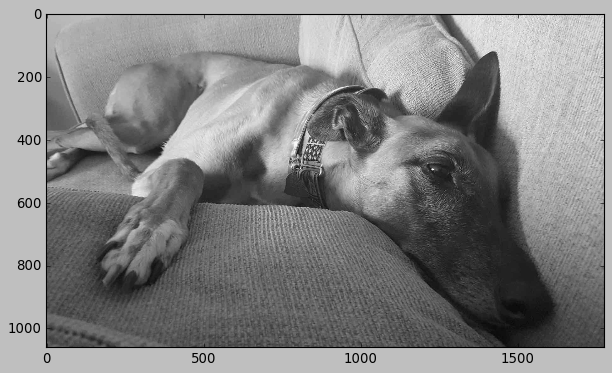

In [2]:
plt.style.use('classic')
img = Image.open('data/sleepyluz.jpg')
#img = Image.open('')
## Convert image to grayscale
imggray = img.convert('LA')
## Convert to numpy array
imgmat = np.array(list(imggray.getdata(band=0)),float)
## Reshape according to original image dimesions
imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9, 6))
plt.imshow(imgmat,cmap="gray")
plt.show()

In [3]:
U,S,V = np.linalg.svd(imgmat)

In [4]:
### Dimensions of the original matrix
imgmat.shape


(1058, 1776)

In [5]:
## Dimensions of matrix in the singular value decomposition
U.shape

(1058, 1058)

In [6]:
## Dimensions of matrix in the singular value decomposition
S.shape

(1058,)

In [7]:
## Dimensions of matrix in the singular value decomposition
V.shape

(1776, 1776)

In [8]:
### Matrix in the singular value decomposition
#U #uncoment and run
#S #uncoment and run
#V #uncoment and run

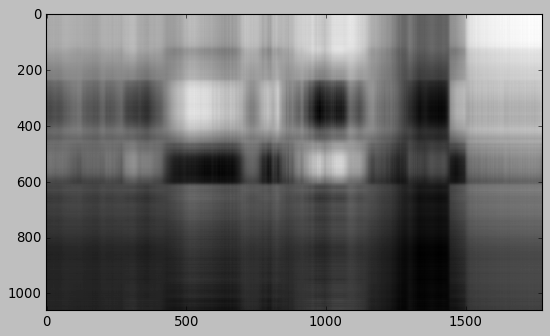

In [9]:
### Here is a rank-one matrix from the PCA approximation
reconstimg = np.matrix(U[:, :2]) * np.diag(S[:2]) * np.matrix(V[:2, :])
plt.imshow(reconstimg,cmap="gray")
plt.show()

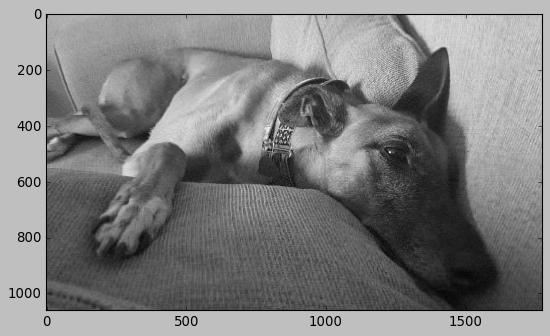

In [10]:
## Principal Components
partialsum = np.zeros((U.shape[0],V.shape[0]))
last = 100 # number of terms in partial sum of rank-one matrices, do not exceed rank of the original matrix
for r in range(0,last):
    partialsum = partialsum + S[r]*np.outer(U[:,r],V[r,:])
plt.imshow(partialsum,cmap=plt.cm.gray)
plt.show()

In [11]:
plt.close('all')